In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
np.set_printoptions(suppress=True)
DISPLAY_MAX_ROWS = 20 # number of max rows to print for a DataFrame 
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

# Step 1

In [2]:
data = pd.read_csv('session2_homework_data.csv')
data.head(10)

,Date,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR,Output1,Easing,Tightening
0,1/5/1981,13.52,13.09,12.289,12.28,12.294,12.152,11.672,18.015526,NaN,NaN
1,1/6/1981,13.58,13.16,12.429,12.31,12.214,12.112,11.672,18.091398,NaN,NaN
2,1/7/1981,14.50,13.90,12.929,12.78,12.614,12.382,11.892,19.447314,NaN,NaN
3,1/8/1981,14.76,14.00,13.099,12.95,12.684,12.352,11.912,19.748510,NaN,NaN
4,1/9/1981,15.20,14.30,13.539,13.28,12.884,12.572,12.132,20.572042,NaN,NaN
5,1/12/1981,15.22,14.23,13.179,12.94,12.714,12.452,12.082,20.142185,NaN,NaN
6,1/13/1981,15.24,14.10,13.309,12.97,12.684,12.532,12.082,20.181543,NaN,NaN
7,1/14/1981,15.08,13.90,12.959,12.75,12.614,12.532,12.072,19.777288,NaN,NaN
8,1/15/1981,15.25,14.09,13.259,13.02,12.774,12.622,12.252,20.298884,NaN,NaN
9,1/16/1981,15.15,13.98,13.089,12.85,12.664,12.532,12.132,19.967575,NaN,NaN


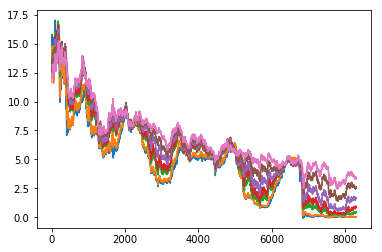

In [3]:
plt.figure()
plt.plot(data.iloc[:,1:8])
plt.show()

# Step 2. Linear Regression

## Task 1

In [4]:
y = data['Output1'].values.reshape(-1,1)

slope = []
intercept = []

for i in range(1,8):
    X = data.iloc[:,i].values.reshape(-1,1)
    
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    
    slope.append(regr.coef_[0][0])
    intercept.append(regr.intercept_[0])
    
linear_reg_1_result = pd.DataFrame({'input':data.columns[1:8],'intercept':intercept,'slope':slope})
#print(linear_reg_1_result)

In [5]:
linear_reg_1_result

,input,intercept,slope
0,USGG3M,-11.723184,2.507561
1,USGG6M,-12.097528,2.497235
2,USGG2YR,-13.055775,2.400449
3,USGG3YR,-13.861618,2.455793
4,USGG5YR,-15.436649,2.568742
5,USGG10YR,-18.063370,2.786991
6,USGG30YR,-21.085905,3.069561


## Task 2

In [6]:
X2 = data['Output1'].values.reshape(-1,1)

slope2 = []
intercept2 = []

for i in range(1,8):
    y2 = data.iloc[:,i].values.reshape(-1,1)
    
    regr = linear_model.LinearRegression()
    regr.fit(X2, y2)
    
    slope2.append(regr.coef_[0][0])
    intercept2.append(regr.intercept_[0])
    
linear_reg_2_result = pd.DataFrame({'ouput':data.columns[1:8],'intercept':intercept2,'slope':slope2})
#print(linear_reg_2_result[['ouput','intercept','slope']])

In [7]:
linear_reg_2_result[['ouput','intercept','slope']]

,ouput,intercept,slope
0,USGG3M,4.675134,0.383961
1,USGG6M,4.844370,0.390187
2,USGG2YR,5.438888,0.415185
3,USGG3YR,5.644458,0.406354
4,USGG5YR,6.009421,0.386061
5,USGG10YR,6.481316,0.347754
6,USGG30YR,6.869355,0.304712


# Step 3. Logistic Regression

In [8]:
data['Binary_Output']=np.nan

data.loc[data['Easing']==1,'Binary_Output']=0

data.loc[data['Tightening']==1,'Binary_Output']=1

data_new = data[~pd.isna(data['Binary_Output'])].copy()   # do not select  the binary output values are null

data_new.index = range(len(data_new))   # reindex

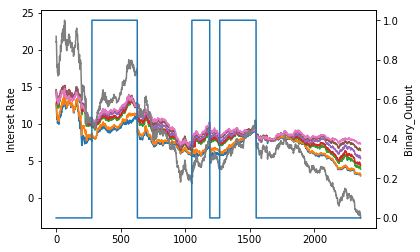

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data_new.iloc[:,1:9])
ax1.set_ylabel('Interset Rate')

ax2 = ax1.twinx()
ax2.plot(data_new['Binary_Output'])
ax2.set_ylabel('Binary_Output')

plt.show()

## Task 1

In [10]:
logistic_regr_1 = linear_model.LogisticRegression()
logistic_regr_1.fit(data_new['USGG3M'].values.reshape(-1,1), data_new['Binary_Output'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
logistic_regr_1.coef_

array([[ 0.17882579]])

In [12]:
logistic_regr_1.intercept_

array([-2.0894677])

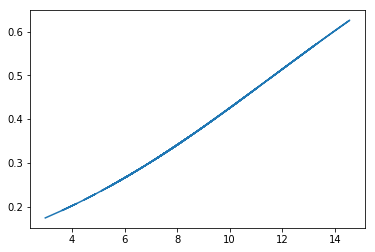

In [13]:
temp = np.array(data_new['USGG3M'].values)
s = logistic_regr_1.intercept_[0]+ temp * logistic_regr_1.coef_[0]
plt.figure()
plt.plot(temp,1/(1+np.exp(-s)))
plt.show()

In [14]:
logistic_regr_1_result = pd.DataFrame({'intercept':logistic_regr_1.intercept_[0],'coeffient':logistic_regr_1.coef_[0]})
logistic_regr_1_predict = pd.DataFrame({'x':temp,'y_predict':1/(1+np.exp(-s)),'y_real':data_new['Binary_Output'].values})

In [15]:
logistic_regr_1_result

,coeffient,intercept
0,0.178826,-2.089468


In [16]:
logistic_regr_1_predict[['x', 'y_predict', 'y_real']]

,x,y_predict,y_real
0,12.690,0.544837,0.0
1,12.300,0.527495,0.0
2,12.180,0.522143,0.0
3,11.680,0.499804,0.0
4,11.190,0.477913,0.0
5,11.150,0.476128,0.0
6,10.600,0.451673,0.0
7,10.780,0.459656,0.0
8,10.630,0.453002,0.0
9,10.630,0.453002,0.0


## Task 2

Sorry, I couldn't figure out how to draw a picture of this multivariable logistic regression. It seems to be a 8-D picture ???

In [17]:
logistic_regr_2 = linear_model.LogisticRegression()
logistic_regr_2.fit(data_new.iloc[:,1:8], data_new['Binary_Output'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
temp = np.matrix(data_new.iloc[:,1:8])
s = logistic_regr_2.intercept_[0]+ temp * logistic_regr_2.coef_[0].reshape(-1,1)
s = np.array(s.T)[0]

In [19]:
logistic_regr_2_result = pd.DataFrame({'input_variables':data_new.iloc[:,1:8].columns,'intercept':logistic_regr_2.intercept_[0],'coeffient':logistic_regr_2.coef_[0]})
logistic_regr_2_predict = pd.DataFrame({'y_predict':1/(1+np.exp(-s)),'y_real':data_new['Binary_Output'].values})

In [20]:
logistic_regr_2_result[['input_variables', 'intercept', 'coeffient']]

,input_variables,intercept,coeffient
0,USGG3M,-3.610923,-2.668837
1,USGG6M,-3.610923,3.340922
2,USGG2YR,-3.610923,2.085327
3,USGG3YR,-3.610923,-1.672815
4,USGG5YR,-3.610923,-2.323212
5,USGG10YR,-3.610923,-0.490693
6,USGG30YR,-3.610923,2.043506


In [21]:
logistic_regr_2_predict

,y_predict,y_real
0,0.300634,0.0
1,0.359973,0.0
2,0.502438,0.0
3,0.610063,0.0
4,0.592557,0.0
5,0.545904,0.0
6,0.649698,0.0
7,0.562249,0.0
8,0.467806,0.0
9,0.494420,0.0


# Step 4. PCA

## Task 1

In [22]:
X = data.iloc[:,1:8]

In [23]:
#print(data[['USGG3M','USGG2YR','USGG5YR']].corr())
data[['USGG3M','USGG2YR','USGG5YR']].corr()

,USGG3M,USGG2YR,USGG5YR
USGG3M,1.000000,0.984314,0.960315
USGG2YR,0.984314,1.000000,0.991637
USGG5YR,0.960315,0.991637,1.000000


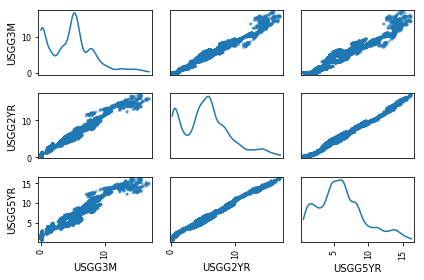

In [24]:
pd.plotting.scatter_matrix(data[['USGG3M','USGG2YR','USGG5YR']], diagonal="kde")
plt.tight_layout()
plt.show()

We can see that these three variables are highly positive correlated with each other.

## Task 2

In [25]:
cov_mat = X.cov()

In [26]:
cov_mat

,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR
USGG3M,11.760393,11.855287,12.303031,11.942035,11.188856,9.924865,8.587987
USGG6M,11.855287,12.000510,12.512434,12.158422,11.406959,10.128890,8.768702
USGG2YR,12.303031,12.512434,13.284203,12.977542,12.279514,11.005377,9.600181
USGG3YR,11.942035,12.158422,12.977542,12.708647,12.068078,10.856033,9.497246
USGG5YR,11.188856,11.406959,12.279514,12.068078,11.543082,10.463386,9.212159
USGG10YR,9.924865,10.128890,11.005377,10.856033,10.463386,9.583483,8.510632
USGG30YR,8.587987,8.768702,9.600181,9.497246,9.212159,8.510632,7.624304


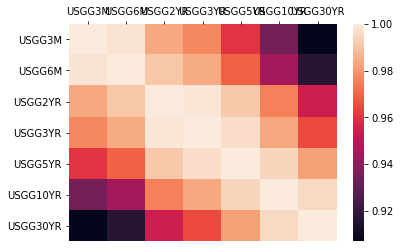

In [27]:
corr_mat = X.corr()
sns.heatmap(corr_mat, vmax=1., square=False).xaxis.tick_top()

We can see that the variance and covariance of each variables are quite stable and similar. So perhaps each different variable is not providing new information. And we can also see that they are highly positively correlated with each other from the heatmap of their correlation.

So, if we just put all these variables as inputs of a linear regression, multicollinearity would occur. We need to use PCA to find the most "valuable" components.

## Task 3

In [28]:
eigenvalues = np.linalg.eigvals(cov_mat)
eigenvectors = np.linalg.eig(cov_mat)[1]

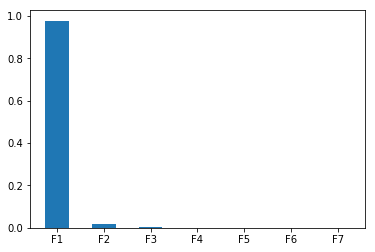

In [29]:
# the importance of factors can be shown by eigenvalues.
plt.figure()
plt.bar(np.arange(7), eigenvalues/eigenvalues.sum(), 0.5)
plt.xticks(np.arange(7), ('F1', 'F2', 'F3', 'F4', 'F5','F6','F7'))
plt.show()


In [30]:
print(eigenvalues.cumsum()/eigenvalues.sum())

[ 0.97834289  0.99810633  0.99966522  0.99984554  0.99995153  0.99998018
  1.        ]


In [31]:
Loadings = pd.DataFrame(eigenvectors.T, columns=["Z"+str(i) for i in range(1, len(X.columns)+1)])

# Standardize X
standardized_x = scale(X)
standardized_x = pd.DataFrame(standardized_x, columns = data.columns[1:8])


F = pd.DataFrame(np.matrix(standardized_x) * eigenvectors,columns=["F"+str(i) for i in range(1, len(X.columns)+1)])

In [32]:
F.mean()

F1   -2.559720e-15
F2    9.439571e-17
F3    3.909858e-16
F4   -2.182658e-16
F5    6.775788e-17
F6   -1.735192e-16
F7    1.593596e-16
dtype: float64

We can see the mean of the projections are all zero, minimizing the residual sum of squares turns out to be equivalent to maximizing the variance of the projections.

In [33]:
Loadings.head(3)  #first three loadings

,Z1,Z2,Z3,Z4,Z5,Z6,Z7
0,0.383961,0.390187,0.415185,0.406354,0.386061,0.347754,0.304712
1,0.507445,0.439461,0.111127,-0.016970,-0.231403,-0.432460,-0.544212
2,-0.529822,-0.111474,0.418787,0.447656,0.246236,-0.150090,-0.497920


In [34]:
F.iloc[:,0:3] #first three factors

,F1,F2,F3
0,5.337175,0.365339,-0.697048
1,5.357562,0.398262,-0.692575
2,5.754533,0.532965,-0.765831
3,5.840446,0.583982,-0.765416
4,6.082971,0.611278,-0.786897
5,5.959239,0.634198,-0.869285
6,5.970642,0.615353,-0.855540
7,5.856190,0.563417,-0.895498
8,6.009739,0.561590,-0.884727
9,5.911551,0.572181,-0.888588


## Task 4

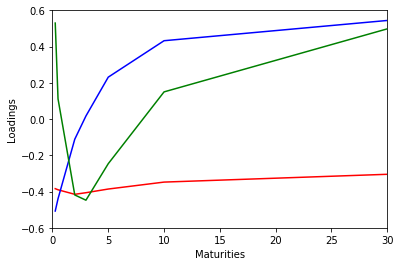

In [35]:
W = eigenvectors[:,0:3]

x_axis = [0.25,0.5,2,3,5,10,30]
fig = plt.figure()
plt.xlim(0,30)
plt.ylim(-0.6,0.6)

# I noticed that the  eigenvectors shown in the picture from the homework file is the opposite direction of my calculated eigenvectors. 
#So, to be consistent, I add a negtive sign before my eigenvectors W

plt.plot(x_axis,-W.T[0],'r')
plt.plot(x_axis,-W.T[1],'b')
plt.plot(x_axis,-W.T[2],'g')

plt.xlabel('Maturities')
plt.ylabel('Loadings')

plt.show()  

We can see that the most important loading(the red line) accounts for 97.8% of the source data above. 

From the picture we can learn that this loading basically gives every original variables the same weight, which means interest rates in different terms have similar distributions. The first factor is the average interest rate of differernt terms.

The second biggest one (the blue line) basically measures the difference between long term interest rates and the shortest one (3 month).

The third biggest one (the green line)  basically measures the difference between other interest rates and the middle term ones (6 month and 2 year).

## Task  5

In [36]:
pca = PCA().fit(standardized_x)

In [37]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [38]:
summary = pca_summary(pca, standardized_x)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.613510,0.975777,0.975777
PC2,0.395023,0.022292,0.998068
PC3,0.105730,0.001597,0.999665
PC4,0.035871,0.000184,0.999849
PC5,0.026636,0.000101,0.999951
PC6,0.014922,0.000032,0.999982
PC7,0.011113,0.000018,1.000000


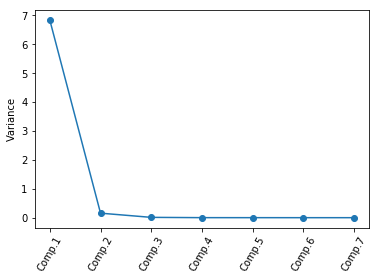

In [39]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardized_x)

In [40]:
Components = pd.DataFrame(pca.components_,columns=["Z"+str(i) for i in range(1, len(X.columns)+1)])

In [41]:
Components

,Z1,Z2,Z3,Z4,Z5,Z6,Z7
0,0.374156,0.376522,0.381568,0.382120,0.381520,0.377888,0.371850
1,0.508238,0.445424,0.146909,0.036569,-0.164414,-0.394540,-0.581101
2,0.532204,0.124251,-0.399086,-0.455261,-0.315307,0.056806,0.481812
3,-0.394772,0.374859,0.433382,0.004529,-0.514726,-0.299882,0.401153
4,0.399827,-0.695349,0.345226,0.272004,-0.205648,-0.297271,0.181109
5,0.044187,-0.105596,0.295580,-0.114947,-0.524318,0.716561,-0.312966
6,0.028314,-0.095975,0.528380,-0.747104,0.381902,-0.080945,-0.015333


In [42]:
PC = pd.DataFrame(np.matrix(standardized_x) * pca.components_.T,columns=["PC"+str(i) for i in range(1, len(X.columns)+1)])

In [43]:
PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5.334642,0.677711,0.429803,-0.106687,-0.078697,0.002565,-0.021493
1,5.352803,0.710526,0.429155,-0.073337,-0.061518,0.014679,-0.016875
2,5.743860,0.866939,0.489928,-0.093913,-0.055280,0.005201,-0.019113
3,5.826013,0.923156,0.489983,-0.097385,-0.016009,-0.006207,-0.022178
4,6.067017,0.964046,0.502571,-0.082484,0.023129,0.010484,-0.016721
5,5.946979,0.974055,0.590858,-0.105485,-0.001997,-0.001231,-0.011244
6,5.958254,0.957106,0.575485,-0.109564,0.035168,0.035714,-0.000382
7,5.849623,0.896802,0.614653,-0.145534,0.010300,0.030394,-0.008609
8,6.002372,0.904194,0.598732,-0.115335,0.034480,0.018154,-0.010931
9,5.903982,0.908682,0.607210,-0.128208,0.023257,0.021659,-0.007072
